In [1]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# 1 try

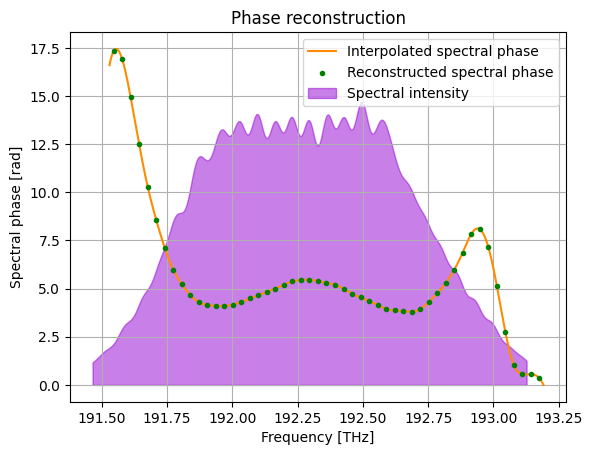

In [23]:
shear = sa.find_shear("data/v1_sheared.csv", "data/v1_not_sheared.csv", how = "slope", show_plot = False)

phase = sa.spider(phase_spectrum = "data/v1_p_spectrum.csv",
          temporal_spectrum = "data/v1_t_spectrum.csv",
          shear = shear,
          smoothing_period = 0.065,
          fiber_length = 44,
          temp_phase_param = -9,
          plot_phase = True,
          what_to_return = "phase")

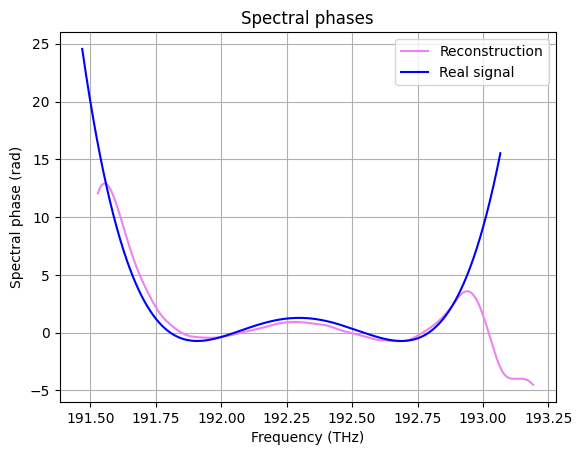

In [25]:
# model

def my_phase(x, free, a,b,c,d):
    return free*(x-a)*(x-b)*(x-c)*(x-d)

freq_start = 191.6
freq_end = 193.2
l_start = 3*10**8/freq_start*10**-3
l_end = 3*10**8/freq_end*10**-3

X = np.linspace(l_start, l_end, 1000)
Y = my_phase(X, 0.02, 1555, 1557, 1561, 1563)

pulse = sa.spectrum(X, Y, "wl", "phase")
pulse.wl_to_freq()
new_phase = phase.copy()
new_phase.Y -= 1.8

sa.compare_plots([new_phase, pulse], legend = ["Reconstruction", "Real signal"], title = "Spectral phases")

# 2 try

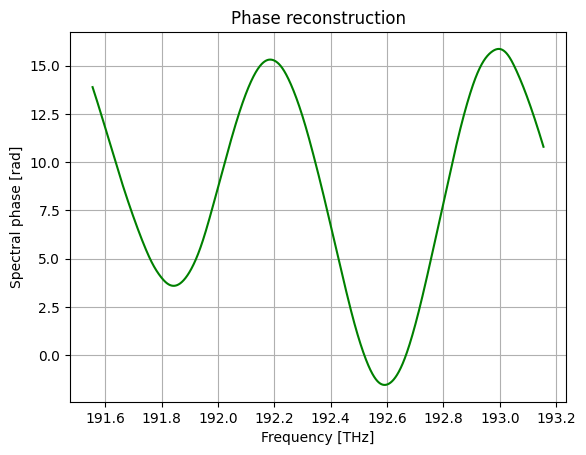

In [ ]:
shear = sa.find_shear("data/v2_sheared.csv", "data/v2_not_sheared.csv", how = "slope", plot = False)

phase = sa.spider(phase_spectrum = "data/v2_p_spectrum.csv",
          temporal_spectrum = "data/v2_t_spectrum.csv",
          shear = shear,
          smoothing_period = 0.065,
          fiber_length = 44,
          temp_phase_param = -2,
          plot_phase = True,
          what_to_return = "phase")

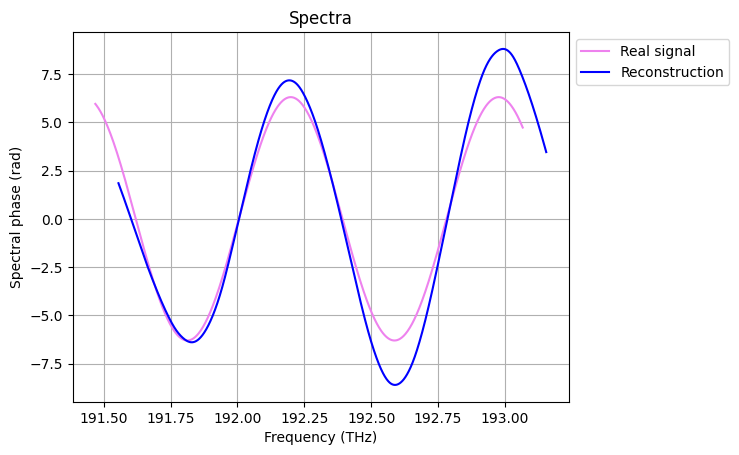

In [ ]:
new_phase = phase.copy()
X_freq = np.linspace(freq_start, freq_end, len(new_phase))

def chirp_phase(frequency, centre, fiber_length):
    c = 299792458 
    l_0 = c/(centre*1e3)
    D_l = 20
    omega = frequency*2*np.pi
    omega_mean = centre*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

chirp_phase_2 = chirp_phase(X_freq, 192.45, 44)
new_phase.Y -= chirp_phase_2 -0.7*(new_phase.X-np.mean(new_phase.X))

def my_phase(x, fr, ampl):
    return ampl*np.sin(fr*x)

freq_start = 191.6
freq_end = 193.2
l_start = 3*10**8/freq_start*10**-3
l_end = 3*10**8/freq_end*10**-3

X = np.linspace(l_start, l_end, 1000)

Y = my_phase(X, 1, 6.3)

model_pulse = sa.spectrum(X, Y, "wl", "phase")
model_pulse.wl_to_freq()
new_phase.Y -= 7.5
new_phase.remove_temporal_phase(-2)
sa.compare_plots([model_pulse, new_phase], legend = ["Real signal", "Reconstruction"])

# 3 try

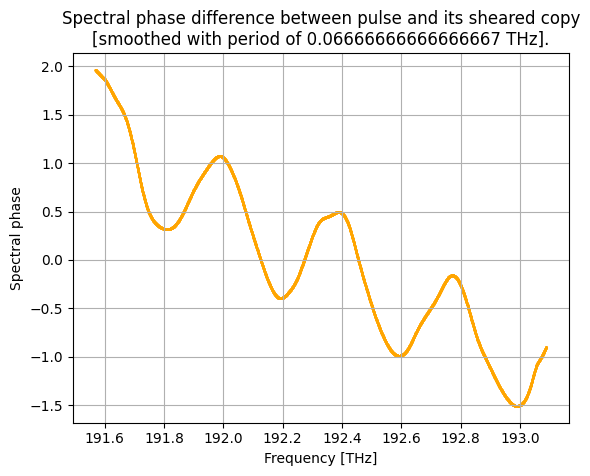

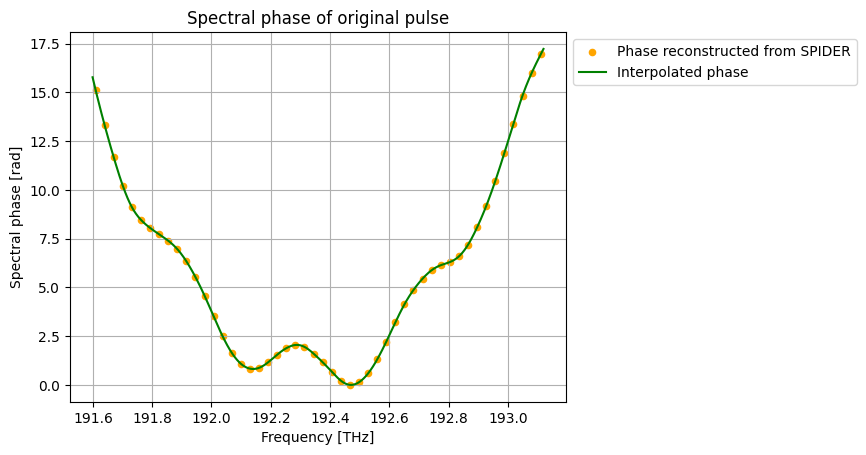

In [ ]:
shear = sa.find_shear("data/v3_sheared.csv", "data/v3_not_sheared.csv", how = "slope", plot = False, smoothing_period=None)

phase = sa.spider(phase_spectrum = "data/v3_p_spectrum.csv",
          temporal_spectrum = "data/v3_t_spectrum.csv",
          shear = shear,
          smoothing_period = 1/15,
          plot_steps = False,
          plot_phase = True,
          what_to_return = "phase")

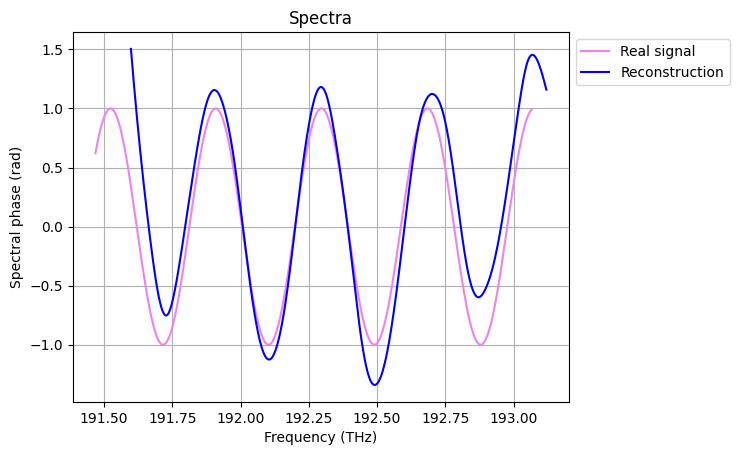

In [ ]:
new_phase = phase[1].copy()
X_freq = np.linspace(freq_start, freq_end, len(new_phase))

def chirp_phase(frequency, centre, fiber_length):
    c = 299792458 
    l_0 = c/(centre*1e3)
    D_l = 20
    omega = frequency*2*np.pi
    omega_mean = centre*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

chirp_phase_2 = chirp_phase(X_freq, 192.36, 44)
new_phase.Y -= chirp_phase_2 -0.7*(new_phase.X-np.mean(new_phase.X))

def my_phase(x, fr, ampl):
    return ampl*np.sin(fr*x)

freq_start = 191.6
freq_end = 193.2
l_start = 3*10**8/freq_start*10**-3
l_end = 3*10**8/freq_end*10**-3

X = np.linspace(l_start, l_end, 1000)

Y = my_phase(X, 2, 1)

model_pulse = sa.spectrum(X, Y, "wl", "phase")
model_pulse.wl_to_freq()
new_phase.Y -= 0.8
sa.compare_plots([model_pulse, new_phase], legend = ["Real signal", "Reconstruction"])